# Paso 2: Selección y Almacenamiento de Datos Relevantes

## Introducción

Luego de realizar la exploración inicial de la API de Mercado Libre, se procede a aplicar una metodología de ciencia de datos para identificar y almacenar los datos que se utilizarán en el análisis. En este challenge se ha decidido trabajar con la subcategoría **"Otros"** (ID: MCO1070), ya que agrupa productos sin una clasificación específica, lo que representa un desafío interesante para identificar similitudes entre ítems heterogéneos. Además, considerando la limitación de la API a un máximo de 1000 productos por consulta, se optará por extraer los 1000 ítems más vendidos (según `sold_quantity`) que tengan stock disponible. Esto permitirá trabajar con una muestra manejable y representativa del universo de productos de esta subcategoría.

## Metodología para la Selección de Datos

1. **Comprensión del Dominio y del Problema:**
   - **Objetivo:**  
     Identificar y agrupar productos similares o idénticos, incluso cuando son vendidos por distintos sellers, para mejorar la experiencia del usuario al facilitar la comparación.
   - **Contexto de la Subcategoría "Otros":**  
     Los productos en "Otros" no cuentan con una clasificación detallada, lo que dificulta la agrupación automática. Por ello, es esencial extraer información que permita identificar similitudes basadas en los datos disponibles.

2. **Selección y Filtrado de Campos:**
   - **Análisis Exploratorio:**  
     Se revisa el DataFrame inicial (por ejemplo, usando `df.head()`) para identificar los campos presentes. Se determina que los siguientes campos son fundamentales para el análisis:
   - **Campos de Texto:**
     - `id`: Identificador único del producto, útil para la referencia y validación.
     - `title`: Título del producto. Debido a que el campo `sanitized_title` generalmente está vacío, se utiliza el `title` original para el análisis textual.
     - *Opcionalmente*, si se cuenta con `description` o `subtitle`, estos pueden aportar contexto adicional.
   - **Campos de Imagen:**
     - `thumbnail`: URL de la imagen principal, esencial para extraer características visuales mediante modelos pre-entrenados (por ejemplo, ResNet o VGG).
   - **Otros Campos Complementarios:**
     - `price`: Permite segmentar y comparar productos por su rango de precio.
     - `sold_quantity`: Indicador de popularidad, utilizado para ordenar los productos y seleccionar los más vendidos.
     - `available_quantity`: Fundamental para filtrar productos con stock disponible.
     - `permalink`: Enlace directo al producto, facilitando la validación manual.

3. **Almacenamiento de los Datos Seleccionados:**
   - **Formato Estructurado:**  
     Se recomienda almacenar los datos en un DataFrame de Pandas, lo que facilita el manejo, la limpieza y el preprocesamiento de la información.
   - **Persistencia:**  
     Aunque inicialmente se mantendrán los datos en memoria para el análisis exploratorio, en fases posteriores se podrán guardar en formatos como CSV o en bases de datos para permitir la replicación y análisis incremental.

4. **Preprocesamiento Inicial:**
   - **Para los Datos Textuales:**  
     Se limpiarán y normalizarán los títulos (conversión a minúsculas, eliminación de puntuación y stopwords), y se convertirán en vectores mediante técnicas como TF-IDF o embeddings para medir similitudes semánticas entre productos.
   - **Para las Imágenes:**  
     Se validarán las URLs y, en etapas posteriores, se utilizarán modelos pre-entrenados (como ResNet o VGG) para extraer embeddings que permitan comparar productos de forma visual.

## Conclusión

La estrategia de selección y almacenamiento se centra en extraer y trabajar únicamente con la información que aporta valor al análisis. Al enfocarse en la subcategoría **"Otros"** —que agrupa productos sin una clasificación específica— y extrayendo los 1000 productos más vendidos con stock disponible, se garantiza una muestra representativa y manejable para aplicar técnicas de preprocesamiento, medición de similitud y clustering. Este enfoque permite afrontar el desafío de agrupar ítems similares en un contexto real, optimizando la experiencia del usuario al ofrecer opciones comparables en el marketplace.


#  Consulta del Total de Productos en una Categoría de Mercado Libre

Este script utiliza la API de Mercado Libre para obtener la cantidad total de productos en una categoría específica.

---

## Proceso

1. **Definir Categoría:**
   - Se especifica el `CATEGORY_ID` para la categoría de interés.
   - Por ejemplo: `"MCO1000"` para "Electrónica, Audio y Video" en Colombia.

2. **Conexión a la API:**
   - Se realiza una solicitud GET al endpoint:  
     `https://api.mercadolibre.com/sites/MCO/search?category={CATEGORY_ID}&offset=0`.

3. **Validación de la Respuesta:**
   - Si el estado de la respuesta es `200`, se procesa el campo `paging` del JSON para obtener el número total de productos (`total`).
   - Si la solicitud no es exitosa, se imprime un mensaje indicando el error.

4. **Visualización:**
   - Se imprime la cantidad total de productos disponibles en la categoría consultada.

---

## Salida

El script muestra en consola un mensaje como:
```
Cantidad total de productos en la categoría: [número]
```
Esto indica la cantidad de productos disponibles en la categoría seleccionada.
```

In [1]:
import requests


# Configuración de la API y categoría a consultar
CATEGORY_ID = "MCO1000"
API_BASE_URL = "https://api.mercadolibre.com/sites/MCO/search"


def get_total_products(category_id):
    """
    Obtiene la cantidad total de productos en una categoría de MercadoLibre.

    :param category_id: ID de la categoría a consultar.
    :return: Número total de productos en la categoría.
    """
    url = f"{API_BASE_URL}?category={category_id}&offset=0"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data.get("paging", {}).get("total", 0)

    print("Error en la consulta:", response.status_code)
    return None


def main():
    """Función principal que ejecuta la consulta y muestra el resultado."""
    total_products = get_total_products(CATEGORY_ID)

    if total_products is not None:
        print("Cantidad total de productos en la categoría:", total_products)
    else:
        print("No se pudo obtener la cantidad total de productos.")


if __name__ == "__main__":
    main()


Cantidad total de productos en la categoría: 909123


#  Consulta de Subcategorías en una Categoría Principal de Mercado Libre

Este script obtiene las subcategorías dentro de una categoría principal utilizando la API de Mercado Libre.

---

## Proceso

1. **Definir Categoría Principal:**  
   Se especifica el `CATEGORY_ID` de la categoría principal (por ejemplo, `"MCO1000"` para Electrónica, Audio y Video en Colombia).

2. **Conexión a la API:**  
   Se realiza una solicitud GET al endpoint:  
   `https://api.mercadolibre.com/categories/{CATEGORY_ID}`.

3. **Obtener Subcategorías:**  
   Si la solicitud es exitosa:
   - Se extrae el campo `children_categories`, que contiene las subcategorías.
   - Se muestra el ID, el nombre y el número total de ítems por subcategoría.

4. **Visualización:**  
   Se imprimen las subcategorías disponibles con el formato:  
   ```
   ID: [id] | Nombre: [nombre] | Total ítems: [total_items]
   ```

---

## Salida

El script genera una lista de subcategorías con su respectivo número de productos disponibles.
```

In [2]:
import requests


# ID de la categoría principal "Electrónica, Audio y Video" en Colombia
CATEGORY_ID = "MCO1000"
API_BASE_URL = "https://api.mercadolibre.com/categories"


def get_subcategories(category_id):
    """
    Obtiene las subcategorías dentro de una categoría principal en MercadoLibre.

    :param category_id: ID de la categoría principal.
    :return: Lista de subcategorías con su ID, nombre y total de ítems.
    """
    url = f"{API_BASE_URL}/{category_id}"
    response = requests.get(url)

    if response.status_code == 200:
        category_data = response.json()
        return category_data.get("children_categories", [])

    print(f"Error al obtener subcategorías: {response.status_code}")
    return None


def main():
    """Función principal que ejecuta la consulta y muestra las subcategorías."""
    subcategories = get_subcategories(CATEGORY_ID)

    if subcategories:
        print("Subcategorías disponibles:")
        for subcat in subcategories:
            print(
                f"ID: {subcat['id']} | Nombre: {subcat['name']} | "
                f"Total ítems: {subcat['total_items_in_this_category']}"
            )
    else:
        print("No se encontraron subcategorías.")


if __name__ == "__main__":
    main()


Subcategorías disponibles:
ID: MCO3690 | Nombre: Accesorios Audio y Video | Total ítems: 69026
ID: MCO431414 | Nombre: Accesorios para TV | Total ítems: 38198
ID: MCO3835 | Nombre: Audio | Total ítems: 426937
ID: MCO5054 | Nombre: Cables | Total ítems: 156003
ID: MCO11830 | Nombre: Componentes Electrónicos | Total ítems: 219639
ID: MCO4632 | Nombre: Controles Remotos | Total ítems: 23099
ID: MCO173235 | Nombre: Drones y Accesorios | Total ítems: 42144
ID: MCO442042 | Nombre: Fundas y Bolsos | Total ítems: 4897
ID: MCO176837 | Nombre: Media Streaming | Total ítems: 5794
ID: MCO4102 | Nombre: Pilas y Cargadores | Total ítems: 51488
ID: MCO419930 | Nombre: Repuestos TV | Total ítems: 20923
ID: MCO14903 | Nombre: Televisores | Total ítems: 2684
ID: MCO442056 | Nombre: Video | Total ítems: 12615
ID: MCO4800 | Nombre: Video Beams y Pantallas | Total ítems: 37727
ID: MCO1070 | Nombre: Otros | Total ítems: 7577


## Confirmación de que no tiene subcategorías MCO1070

In [5]:
# ID de la categoría principal "Electrónica, Audio y Video" en Colombia
CATEGORY_ID = "MCO1070"
API_BASE_URL = "https://api.mercadolibre.com/categories"


def main():
    """Función principal que ejecuta la consulta y muestra las subcategorías."""
    subcategories = get_subcategories(CATEGORY_ID)

    if subcategories:
        print("Subcategorías disponibles:")
        for subcat in subcategories:
            print(
                f"ID: {subcat['id']} | Nombre: {subcat['name']} | "
                f"Total ítems: {subcat['total_items_in_this_category']}"
            )
    else:
        print("No se encontraron subcategorías.")


if __name__ == "__main__":
    main()


No se encontraron subcategorías.


# Justificación de la Elección de la Subcategoría "Otros" (ID: MCO1070)

## Contexto y Problema

En el proceso de extracción y análisis de productos del marketplace, se observó que existen numerosas publicaciones que no encajan en una clasificación definida, lo que las agrupa dentro de la subcategoría **"Otros"**. Esta agrupación representa productos cuya clasificación específica no ha sido determinada o que, por su naturaleza heterogénea, no se ajustan a las categorías tradicionales.

1. **Falta de Clasificación Específica:**
   - Los productos incluidos en "Otros" carecen de una clasificación clara, lo que puede dificultar la comparación directa y el análisis de similitud cuando se combinan con ítems de categorías más definidas.
   - Al concentrarse en esta subcategoría, se puede focalizar el análisis en un conjunto heterogéneo de productos, lo que permite identificar patrones y aplicar técnicas de agrupamiento para encontrar similitudes entre ítems que, a primera vista, pueden parecer dispares.

2. **Limitación de la API (Máximo 1000 Productos por Consulta):**
   - La API de Mercado Libre limita la extracción a un máximo de 1000 productos por consulta. Esta restricción es especialmente relevante en categorías con un alto volumen de publicaciones.
   - Al elegir la subcategoría "Otros", se aprovecha la estrategia de obtener los 1000 productos más vendidos (o más representativos) que tienen stock disponible. Esto permite trabajar con una muestra manejable y representativa de un universo potencialmente muy amplio.
   - La extracción se realizará en bloques (paginación) hasta alcanzar los 1000 ítems, garantizando así que se cuenta con una muestra consistente y comparable, que a su vez se utilizará en el análisis de agrupamiento y en la comparación de productos similares.

## Enfoque Propuesto

- **Extracción y Filtrado:**
  - Se extraerán 1000 ítems de la subcategoría "Otros" (*ID: MCO1070*), aplicando el criterio de seleccionar solo aquellos productos que tienen stock disponible.
  - Se ordenarán los resultados por la cantidad de ventas (`sold_quantity_desc`), de forma que se obtengan los 1000 productos más vendidos dentro de esta subcategoría.

- **Análisis y Agrupamiento:**
  - Una vez obtenida la muestra de 1000 productos, se procederá a realizar el preprocesamiento (técnicas de NLP para los títulos, extracción de características de imágenes, etc.) y se aplicarán algoritmos de clustering para identificar ítems similares.
  - Este enfoque permite, pese a la heterogeneidad inherente a la subcategoría "Otros", agrupar y comparar productos que pueden estar ofreciendo funciones o características similares, mejorando así la experiencia del usuario al presentar opciones comparables.


In [10]:
import requests
import pandas as pd
import time
from tqdm import tqdm


# Configuración de parámetros
CATEGORY_ID = "MCO1070"  # ID de la subcategoría a analizar
TARGET_COUNT = 1000  # Número objetivo de productos a extraer
OFFSET_STEP = 50  # Tamaño de paginado de la API
API_BASE_URL = "https://api.mercadolibre.com/sites/MCO/search"


def fetch_products(category_id, target_count, offset_step):
    """
    Extrae productos de una subcategoría en MercadoLibre ordenados por ventas.

    :param category_id: ID de la subcategoría a consultar.
    :param target_count: Número objetivo de productos a extraer.
    :param offset_step: Tamaño de los bloques de datos devueltos por la API.
    :return: Lista de productos con stock disponible.
    """
    products = []
    offset = 0

    with tqdm(total=target_count, desc="Extrayendo productos") as pbar:
        while len(products) < target_count:
            url = f"{API_BASE_URL}?category={category_id}&sort=sold_quantity_desc&offset={offset}"
            response = requests.get(url)

            if response.status_code != 200:
                print(f"Error en la consulta de offset {offset}: {response.status_code}")
                break

            data = response.json()
            results = data.get("results", [])

            if not results:
                # Salir del bucle si no hay más resultados
                break

            # Filtrar productos con stock disponible
            available_items = [item for item in results if item.get("available_quantity", 0) > 0]
            products.extend(available_items)

            # Actualizar el progreso
            pbar.update(len(available_items))

            # Incrementar el offset para la siguiente página
            offset += offset_step
            time.sleep(0.5)  # Pausa para evitar sobrecargar la API

    return products[:target_count]


def main():
    """Función principal para ejecutar la extracción y mostrar los datos."""
    top_items = fetch_products(CATEGORY_ID, TARGET_COUNT, OFFSET_STEP)

    if top_items:
        # Convertir a DataFrame para análisis posterior
        global df
        df = pd.json_normalize(top_items)
        print(f"\nTotal de productos que cumplen la condición: {len(top_items)}")
        print("Muestra de los primeros registros del DataFrame:")
        print(df.head())
    else:
        print("No se encontraron productos que cumplan la condición.")


if __name__ == "__main__":
    main()


Extrayendo productos: 100%|██████████| 1000/1000 [00:15<00:00, 66.08it/s]


Total de productos que cumplen la condición: 1000
Muestra de los primeros registros del DataFrame:
              id                                              title condition  \
0  MCO1929013496   Impulsor Cerca Electrica Para Ganado 100km M. Jr       new   
1  MCO1312345739                     Cerca 75km - Ganado - Impulsor       new   
2  MCO1401210195      Planta Cerca Electrica Para Ganado 50km M. Jr       new   
3   MCO601595467  Limpiador  Electrónico -removedor De Polvo - A...       new   
4   MCO611865640  Planta Cerca Eléctrica Solar 100km, Incluye Pa...       new   

                   thumbnail_id catalog_product_id listing_type_id  \
0  621695-MCO74838849219_032024               None        gold_pro   
1  926804-MCO70350738436_072023               None        gold_pro   
2  802783-MCO74899505438_032024               None        gold_pro   
3  995727-MCO73203873773_122023               None    gold_special   
4  844953-MCO45203598828_032021               None        gold_

In [12]:
df

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,...,variations_data.54303203436.attributes,variations_data.54303203436.attribute_combinations,variations_data.54303203432.thumbnail,variations_data.54303203432.ratio,variations_data.54303203432.name,variations_data.54303203432.pictures_qty,variations_data.54303203432.price,variations_data.54303203432.user_product_id,variations_data.54303203432.attributes,variations_data.54303203432.attribute_combinations
0,MCO1929013496,Impulsor Cerca Electrica Para Ganado 100km M. Jr,new,621695-MCO74838849219_032024,None,gold_pro,,https://articulo.mercadolibre.com.co/MCO-19290...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MCO1312345739,Cerca 75km - Ganado - Impulsor,new,926804-MCO70350738436_072023,None,gold_pro,,https://articulo.mercadolibre.com.co/MCO-13123...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MCO1401210195,Planta Cerca Electrica Para Ganado 50km M. Jr,new,802783-MCO74899505438_032024,None,gold_pro,,https://articulo.mercadolibre.com.co/MCO-14012...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MCO601595467,Limpiador Electrónico -removedor De Polvo - A...,new,995727-MCO73203873773_122023,None,gold_special,,https://articulo.mercadolibre.com.co/MCO-60159...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MCO611865640,"Planta Cerca Eléctrica Solar 100km, Incluye Pa...",new,844953-MCO45203598828_032021,None,gold_pro,,https://articulo.mercadolibre.com.co/MCO-61186...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MCO541556444,Cuaderno De Bocetos De Diseño De Moda: Pretty...,new,742038-MCO47940146388_102021,None,gold_special,,https://articulo.mercadolibre.com.co/MCO-54155...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,MCO542097832,Gripple Plus Medium Pack De 20 | Alambre Joine...,new,926412-MCO44224848873_122020,None,gold_special,,https://articulo.mercadolibre.com.co/MCO-54209...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,MCO542414089,Presurizador Bomba Automatico Soluciona La Baj...,new,914137-MCO45760245009_042021,None,gold_pro,,https://articulo.mercadolibre.com.co/MCO-54241...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,MCO542469534,"8,5 X 11 Sostenedor De La Muestra De Acrílico ...",new,864629-MCO40475967701_012020,None,gold_special,,https://articulo.mercadolibre.com.co/MCO-54246...,buy_it_now,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Estadistica descriptiva de los datos elegidos

Este script permite realizar una exploración básica e inicial del DataFrame que contiene datos de productos obtenidos de la API de Mercado Libre.

---

## Proceso

1. **Visualización de Columnas Disponibles:**
   - Se listan todas las columnas del DataFrame para identificar los campos que se pueden analizar.

2. **Información General del DataFrame:**
   - Se utiliza `df.info()` para obtener un resumen del DataFrame, incluyendo:
     - Número de filas y columnas.
     - Tipos de datos.
     - Cantidad de valores no nulos por columna.

3. **Distribución de la Condición del Producto:**
   - Se analiza el campo `'condition'` (si está disponible), que usualmente indica si un producto es **nuevo**, **usado** o está **reacondicionado**.
   - Se utiliza `value_counts()` para mostrar la cantidad de productos por cada tipo de condición.

4. **Exploración del Campo 'attributes':**
   - Este campo puede contener listas o diccionarios con información adicional del producto (como dimensiones, color, etc.).
   - Se visualiza un ejemplo del contenido del campo `'attributes'` del primer producto.

---

## Salida

- **Columnas Disponibles:**  
  Una lista con los nombres de todas las columnas del DataFrame.
  
- **Información General:**  
  Un resumen del tamaño y tipo de datos del DataFrame.

- **Distribución del Campo 'condition':**  
  Una tabla con la cantidad de productos por cada tipo de condición.

- **Contenido del Campo 'attributes':**  
  Ejemplo del contenido de este campo para entender su estructura y decidir cómo procesarlo posteriormente.

---

## Aplicación

Este análisis inicial ayuda a:
- Identificar los campos más relevantes para el análisis posterior.
- Entender la estructura del campo `'attributes'` para determinar cómo procesarlo.
- Detectar posibles valores faltantes o inconsistencias en el DataFrame.


In [13]:
import pandas as pd


# 1. Visualizar todas las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns.tolist())

# 2. Información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# 3. Distribución de la condición del producto
print("\nDistribución del campo 'condition':")
print(df['condition'].value_counts())

# 4. Ejemplo de exploración del campo 'attributes'
# Este campo puede contener información compleja (por ejemplo, listas o diccionarios)
print("\nEjemplo del contenido del campo 'attributes' del primer producto:")
print(df['attributes'].iloc[0])


Columnas disponibles en el DataFrame:
['id', 'title', 'condition', 'thumbnail_id', 'catalog_product_id', 'listing_type_id', 'sanitized_title', 'permalink', 'buying_mode', 'site_id', 'category_id', 'domain_id', 'thumbnail', 'currency_id', 'order_backend', 'price', 'original_price', 'available_quantity', 'official_store_id', 'use_thumbnail_id', 'accepts_mercadopago', 'stop_time', 'attributes', 'winner_item_id', 'catalog_listing', 'discounts', 'promotion_decorations', 'promotions', 'inventory_id', 'sale_price.price_id', 'sale_price.amount', 'sale_price.conditions.eligible', 'sale_price.conditions.context_restrictions', 'sale_price.conditions.start_time', 'sale_price.conditions.end_time', 'sale_price.currency_id', 'sale_price.exchange_rate', 'sale_price.payment_method_prices', 'sale_price.payment_method_type', 'sale_price.regular_amount', 'sale_price.type', 'sale_price.metadata.campaign_id', 'sale_price.metadata.promotion_id', 'sale_price.metadata.promotion_type', 'shipping.store_pick_up',

# Limpieza de Columnas en DataFrame

Este script analiza y limpia las columnas del DataFrame identificando aquellas con alto porcentaje de valores nulos o que contienen valores constantes.

---

## Proceso

### 1. **Conversión de Objetos Complejos:**
   - Utiliza una función recursiva (`make_hashable`) para convertir listas y diccionarios en estructuras hashables (tuplas), permitiendo calcular el número de valores únicos (`nunique`) en columnas con estructuras complejas.

### 2. **Creación de un Resumen del DataFrame:**
   - Genera un resumen de cada columna, incluyendo:
     - **`dtype`:** Tipo de dato de la columna.
     - **`missing_count`:** Cantidad de valores nulos.
     - **`missing_ratio`:** Proporción de valores nulos en la columna.
     - **`unique_count`:** Número de valores únicos, tratando listas y diccionarios como elementos hashables.

### 3. **Ordenar el Resumen:**
   - Ordena las columnas por la proporción de valores nulos (`missing_ratio`), facilitando la identificación de las columnas con más datos faltantes.

### 4. **Definir Umbrales para Limpieza:**
   - **`missing_threshold`:** Porcentaje máximo permitido de valores nulos. Las columnas con un porcentaje mayor son marcadas para eliminación.
   - **`unique_threshold`:** Número mínimo de valores únicos para considerar una columna como relevante. Columnas constantes (único valor) son marcadas para eliminación.

### 5. **Identificar Columnas a Eliminar:**
   - Columnas con más del `missing_threshold` de valores nulos.
   - Columnas con menos de `unique_threshold + 1` valores únicos (es decir, constantes).

### 6. **Filtrar el DataFrame:**
   - Combina ambas listas de columnas a eliminar y las elimina del DataFrame.
   - Imprime el tamaño del DataFrame antes y después de la limpieza.

---

## Salida

1. **Resumen de Columnas:**
   - Una tabla con el tipo de dato, cantidad y proporción de valores nulos, y el número de valores únicos por columna.
2. **Columnas con Más del Umbral de Valores Nulos:**
   - Lista de las columnas que exceden el `missing_threshold`.
3. **Columnas Constantes:**
   - Lista de las columnas que tienen un único valor.
4. **DataFrame Limpio:**
   - Se imprime el tamaño del DataFrame original y el filtrado.

---

## Aplicación

Este análisis ayuda a:
- Detectar columnas irrelevantes debido a su alto porcentaje de valores nulos o constancia.
- Reducir el tamaño del DataFrame para análisis más eficientes.
- Preparar los datos para modelos o análisis posteriores eliminando ruido innecesario.


In [16]:
import pandas as pd


def make_hashable(x):
    """
    Convierte un objeto en una estructura hashable.
    :param x: Objeto a convertir (puede ser lista, diccionario, o cualquier otro tipo).
    :return: Objeto convertido en una estructura hashable.
    """
    if isinstance(x, list):
        return tuple(make_hashable(e) for e in x)
    elif isinstance(x, dict):
        return tuple(sorted((k, make_hashable(v)) for k, v in x.items()))
    else:
        return x


def summarize_dataframe(df, missing_threshold=0.8, unique_threshold=1):
    """
    Genera un resumen estadístico de un DataFrame, identificando columnas con
    valores nulos altos o constantes, y proporciona una versión filtrada del DataFrame.
    
    :param df: DataFrame a analizar.
    :param missing_threshold: Umbral para columnas con alta proporción de valores nulos.
    :param unique_threshold: Umbral para columnas con pocos valores únicos.
    :return: Resumen de columnas y DataFrame filtrado.
    """
    # Calcular número único de valores por columna
    unique_counts = df.apply(lambda col: col.apply(make_hashable).nunique())

    # Crear resumen de columnas
    summary = pd.DataFrame({
        'dtype': df.dtypes,
        'missing_count': df.isnull().sum(),
        'missing_ratio': df.isnull().mean(),
        'unique_count': unique_counts
    })

    # Ordenar el resumen por porcentaje de valores nulos
    summary_sorted = summary.sort_values(by='missing_ratio', ascending=False)
    print("Resumen de columnas (ordenado por porcentaje de valores nulos):")
    print(summary_sorted)

    # Identificar columnas con alto porcentaje de valores nulos
    columns_high_missing = summary[summary['missing_ratio'] > missing_threshold].index.tolist()
    print(f"\nColumnas con más del {missing_threshold * 100}% de valores nulos:")
    print(columns_high_missing)

    # Identificar columnas constantes
    columns_constant = summary[summary['unique_count'] <= unique_threshold].index.tolist()
    print("\nColumnas constantes (con 1 o menos valores únicos):")
    print(columns_constant)

    # Opcional: Filtrar el DataFrame eliminando columnas vacías/constantes
    columns_to_drop = set(columns_high_missing + columns_constant)
    df_filtered = df.drop(columns=columns_to_drop)

    print("\nShape del DataFrame original:", df.shape)
    print("Shape del DataFrame después de eliminar columnas vacías/constantes:", df_filtered.shape)

    return summary_sorted, df_filtered


# Ejecución principal
if __name__ == "__main__":
    global df_filtered
    # Supongamos que `df` ya está definido previamente en tu entorno
    summary, df_filtered = summarize_dataframe(df)


Resumen de columnas (ordenado por porcentaje de valores nulos):
                          dtype  missing_count  missing_ratio  unique_count
promotions               object           1000            1.0             0
catalog_product_id       object           1000            1.0             0
winner_item_id           object           1000            1.0             0
discounts                object           1000            1.0             0
promotion_decorations    object           1000            1.0             0
...                         ...            ...            ...           ...
address.state_id         object              0            0.0            20
seller.nickname          object              0            0.0           193
seller.id                 int64              0            0.0           193
shipping.shipping_score   int64              0            0.0             1
id                       object              0            0.0          1000

[611 rows x 4 columns]


In [17]:
df_filtered.head()

,id,title,condition,thumbnail_id,listing_type_id,permalink,thumbnail,order_backend,price,available_quantity,...,shipping.mode,shipping.tags,seller.id,seller.nickname,address.state_id,address.state_name,address.city_id,address.city_name,installments.quantity,installments.amount
0,MCO1929013496,Impulsor Cerca Electrica Para Ganado 100km M. Jr,new,621695-MCO74838849219_032024,gold_pro,https://articulo.mercadolibre.com.co/MCO-19290...,http://http2.mlstatic.com/D_621695-MCO74838849...,1,162690,1,...,me2,"[fulfillment, mandatory_free_shipping]",473010128,PROELECTRODECOLOMBIA,CO-ANT,Antioquia,TUNPQ01BUjdjNWY5,Marinilla,12.0,13558.0
1,MCO1312345739,Cerca 75km - Ganado - Impulsor,new,926804-MCO70350738436_072023,gold_pro,https://articulo.mercadolibre.com.co/MCO-13123...,http://http2.mlstatic.com/D_926804-MCO70350738...,2,165000,1,...,me2,"[fulfillment, mandatory_free_shipping]",362243902,CERCASDELORIENTE,CO-ANT,Antioquia,Q08tQU5URWzCoFNhbnR1YXJpbw,El Santuario,12.0,13750.0
2,MCO1401210195,Planta Cerca Electrica Para Ganado 50km M. Jr,new,802783-MCO74899505438_032024,gold_pro,https://articulo.mercadolibre.com.co/MCO-14012...,http://http2.mlstatic.com/D_802783-MCO74899505...,3,140000,1,...,me2,[mandatory_free_shipping],473010128,PROELECTRODECOLOMBIA,CO-ANT,Antioquia,TUNPQ01BUjdjNWY5,Marinilla,12.0,11667.0
3,MCO601595467,Limpiador Electrónico -removedor De Polvo - A...,new,995727-MCO73203873773_122023,gold_special,https://articulo.mercadolibre.com.co/MCO-60159...,http://http2.mlstatic.com/D_995727-MCO73203873...,4,21500,1,...,me2,[self_service_out],36449755,HRICARDO13,CO-VAC,Valle Del Cauca,TUNPQ0NBTDYyZDA0,Cali,3.0,7167.0
4,MCO611865640,"Planta Cerca Eléctrica Solar 100km, Incluye Pa...",new,844953-MCO45203598828_032021,gold_pro,https://articulo.mercadolibre.com.co/MCO-61186...,http://http2.mlstatic.com/D_844953-MCO45203598...,5,690000,1,...,me2,[mandatory_free_shipping],74243544,VICTORJAIMED,CO-BOY,Boyaca,TUNPQ0RVSTJiYmU5,Duitama,12.0,57500.0


In [18]:
df_filtered.columns

Index(['id', 'title', 'condition', 'thumbnail_id', 'listing_type_id',
       'permalink', 'thumbnail', 'order_backend', 'price',
       'available_quantity', 'use_thumbnail_id', 'stop_time', 'attributes',
       'sale_price.amount', 'sale_price.conditions.context_restrictions',
       'sale_price.type', 'shipping.free_shipping', 'shipping.logistic_type',
       'shipping.mode', 'shipping.tags', 'seller.id', 'seller.nickname',
       'address.state_id', 'address.state_name', 'address.city_id',
       'address.city_name', 'installments.quantity', 'installments.amount'],
      dtype='object')

# Selección de Campos Pertinentes para el Análisis

En el contexto del challenge, el objetivo es identificar y agrupar productos similares o idénticos en el marketplace. Para ello, se recomienda centrarse en los campos que permiten realizar comparaciones tanto desde el punto de vista textual como visual, y que aporten atributos relevantes del producto.

## Campos Seleccionados y Justificación

- **id:**  
  Permite identificar de manera única cada producto y realizar seguimiento a lo largo del análisis.

- **title**  
  - **title:** Contiene el título original del producto, que es esencial para evaluar la descripción y detectar similitudes semánticas.  

- **attributes:**  
  Contiene información adicional relevante (como marca, modelo, etc.) que puede ser crucial para confirmar la similitud entre productos, especialmente cuando los títulos pueden variar ligeramente.

- **thumbnail:**  
  Proporciona la URL de la imagen principal del producto, la cual se utilizará para el análisis visual mediante la extracción de features (por ejemplo, usando modelos pre-entrenados de visión por computadora).

- **price :**  
  El precio es un dato útil para filtrar o agrupar productos, ya que productos similares suelen tener rangos de precio cercanos.  


In [19]:
pertinent_columns = ['id', 'title', 'attributes', 'thumbnail', 'price']
df_pertinent = df_filtered[pertinent_columns]
df_pertinent

,id,title,attributes,thumbnail,price
0,MCO1929013496,Impulsor Cerca Electrica Para Ganado 100km M. Jr,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_621695-MCO74838849...,162690
1,MCO1312345739,Cerca 75km - Ganado - Impulsor,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_926804-MCO70350738...,165000
2,MCO1401210195,Planta Cerca Electrica Para Ganado 50km M. Jr,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_802783-MCO74899505...,140000
3,MCO601595467,Limpiador Electrónico -removedor De Polvo - A...,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_995727-MCO73203873...,21500
4,MCO611865640,"Planta Cerca Eléctrica Solar 100km, Incluye Pa...","[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_844953-MCO45203598...,690000
...,...,...,...,...,...
995,MCO541556444,Cuaderno De Bocetos De Diseño De Moda: Pretty...,"[{'id': 'ITEM_CONDITION', 'name': 'Condición d...",http://http2.mlstatic.com/D_742038-MCO47940146...,130900
996,MCO542097832,Gripple Plus Medium Pack De 20 | Alambre Joine...,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_926412-MCO44224848...,273000
997,MCO542414089,Presurizador Bomba Automatico Soluciona La Baj...,"[{'id': 'BRAND', 'name': ' Marca del producto ...",http://http2.mlstatic.com/D_914137-MCO45760245...,379999
998,MCO542469534,"8,5 X 11 Sostenedor De La Muestra De Acrílico ...","[{'id': 'COLOR', 'name': 'Color', 'value_id': ...",http://http2.mlstatic.com/D_864629-MCO40475967...,209000


## Revisión en detalle de los atributos de los productos

Este script analiza el contenido del campo `attributes` de un DataFrame que contiene información de productos. El campo `attributes` suele incluir detalles adicionales sobre cada producto (como dimensiones, color, marca, etc.).

---

## Proceso

### 1. **Filtrar Columnas Relevantes:**
   - Se seleccionan las columnas más importantes para el análisis, como:
     - `id`: Identificador único del producto.
     - `title`: Título del producto.
     - `attributes`: Detalles adicionales del producto.
     - `thumbnail`: URL de la imagen del producto.
     - `price`: Precio del producto.

### 2. **Explorar Atributos del Primer Producto:**
   - Se accede al contenido del campo `attributes` para el primer producto del DataFrame.
   - Este campo suele contener una lista de diccionarios, donde cada diccionario representa un atributo específico.

### 3. **Mostrar Información de Cada Atributo:**
   - Para cada atributo, se extraen y muestran las siguientes claves:
     - **`id`:** Identificador único del atributo.
     - **`name`:** Nombre del atributo.
     - **`value_id`:** Identificador del valor del atributo.
     - **`value_name`:** Valor del atributo en formato legible.
     - **`value_type`:** Tipo del valor (p. ej., string, número).
     - **`value_struct`:** Estructura compleja (si aplica, p. ej., dimensiones o unidades).

---

## Salida

El script imprime en consola la información de los atributos del primer producto en el siguiente formato:



In [21]:
# Extraer el contenido del campo 'attributes' del primer producto
first_product_attributes = df_pertinent['attributes'].iloc[0]

print("Explorando los atributos del primer producto:")
print("-" * 50)

# Iterar sobre cada atributo y mostrar la información clave
for attr in first_product_attributes:
    attr_id = attr.get('id')
    attr_name = attr.get('name')
    value_id = attr.get('value_id')
    value_name = attr.get('value_name')
    value_type = attr.get('value_type')
    value_struct = attr.get('value_struct')
    
    print(f"Attribute ID: {attr_id}")
    print(f"Name: {attr_name}")
    print(f"Value ID: {value_id}")
    print(f"Value Name: {value_name}")
    print(f"Value Type: {value_type}")
    print(f"Value Struct: {value_struct}")
    print("-" * 50)


Explorando los atributos del primer producto:
--------------------------------------------------
Attribute ID: BRAND
Name:  Marca del producto electrónico
Value ID: None
Value Name: JR CERCA ELECTRICA
Value Type: string
Value Struct: None
--------------------------------------------------
Attribute ID: GTIN
Name: Código universal de producto
Value ID: -1
Value Name: None
Value Type: string
Value Struct: None
--------------------------------------------------
Attribute ID: ITEM_CONDITION
Name: Condición del ítem
Value ID: 2230284
Value Name: Nuevo
Value Type: list
Value Struct: None
--------------------------------------------------
Attribute ID: PACKAGE_LENGTH
Name: Largo del paquete
Value ID: None
Value Name: 22 cm
Value Type: number_unit
Value Struct: {'number': 22, 'unit': 'cm'}
--------------------------------------------------
Attribute ID: PACKAGE_WEIGHT
Name: Peso del paquete
Value ID: None
Value Name: 1240 g
Value Type: number_unit
Value Struct: {'number': 1240, 'unit': 'g'}
--

# Análisis de Frecuencia de Atributos en el Dataset

Este script analiza los atributos presentes en los productos de un DataFrame, calculando su frecuencia global y recopilando estadísticas específicas por producto.

---

## Proceso

### 1. **Inicialización de Contadores:**
   - Se utiliza `Counter` de la librería `collections` para registrar la frecuencia global de cada atributo (por su `id` y `name`).
   - Se crea un diccionario para almacenar los atributos por producto.

### 2. **Iteración por Producto:**
   - Para cada fila del DataFrame (`df_pertinent`):
     - Se verifica que el campo `attributes` sea una lista.
     - Se extraen los pares `(id, name)` de cada atributo del producto.
     - Se actualiza:
       - El diccionario por producto con la lista de atributos.
       - El contador global con los atributos extraídos.

### 3. **Ordenar Atributos por Frecuencia:**
   - Los atributos se ordenan en orden descendente según su frecuencia en el dataset.

### 4. **Visualización de Resultados:**
   - **Frecuencia Global:**  
     Se imprime la lista de atributos (ID y nombre) con su frecuencia en el dataset.
   - **Estadísticas por Producto:**  
     Para los primeros 5 productos, se muestra:
       - El número de atributos.
       - La lista de atributos (ID y nombre).

---

## Salida

1. **Frecuencia Global de Atributos:**
   - Lista de atributos ordenada por frecuencia:
     ```
     ID: [attr_id] | Nombre: [attr_name] | Frecuencia: [count]
     ```

2. **Estadísticas por Producto (Ejemplo):**
   - Detalles de los primeros 5 productos:
     ```
     Producto [product_id] - Cantidad de atributos: [número]
       Atributos (ID y nombre): [(id1, name1), (id2, name2), ...]
     ```

---

## Aplicación

Este análisis es útil para:
- Identificar los atributos más comunes en el dataset.
- Evaluar la riqueza y diversidad de los datos en el campo `attributes`.
- Seleccionar los atributos más relevantes para análisis posteriores o modelado.


In [22]:
from collections import Counter

def analyze_product_attributes(df):
    """
    Analiza los atributos de los productos en el DataFrame, calculando
    la frecuencia global de atributos y almacenando estadísticas por producto.
    
    :param df: DataFrame con los productos y sus atributos.
    :return: Frecuencia global de atributos (Counter), estadísticas por producto (dict).
    """
    # Inicializar un contador global para los atributos (ID y nombre)
    global_attribute_counter = Counter()

    # Inicializar un diccionario para almacenar, por producto, la lista de atributos (ID y nombre)
    product_attribute_stats = {}

    # Recorrer cada producto del DataFrame
    for idx, row in df.iterrows():
        product_id = row['id']
        
        # Verificar que 'attributes' sea una lista
        if isinstance(row['attributes'], list):
            # Extraer todos los IDs y nombres de atributos del producto
            attributes = [(attr.get('id', 'N/A'), attr.get('name', 'N/A')) for attr in row['attributes']]
            # Almacenar la lista de atributos (ID y nombre) para este producto
            product_attribute_stats[product_id] = attributes
            # Actualizar el contador global con estos atributos
            global_attribute_counter.update(attributes)
        else:
            product_attribute_stats[product_id] = []

    return global_attribute_counter, product_attribute_stats


def display_attribute_statistics(global_attribute_counter, product_attribute_stats):
    """
    Muestra las estadísticas globales de los atributos y un resumen de las estadísticas por producto.
    
    :param global_attribute_counter: Frecuencia global de atributos (Counter).
    :param product_attribute_stats: Estadísticas por producto (dict).
    """
    # Ordenar la frecuencia global de atributos (ID y nombre) de mayor a menor
    sorted_attributes = sorted(global_attribute_counter.items(), key=lambda x: x[1], reverse=True)

    # Imprimir la frecuencia global de atributos (ID y nombre) ordenada
    print("Frecuencia global de atributos (ID y nombre) en el dataset (ordenada):")
    for (attr_id, attr_name), count in sorted_attributes:
        print(f"ID: {attr_id} | Nombre: {attr_name} | Frecuencia: {count}")

    print("\nEstadísticas por producto (primeros 5 productos):")
    for product_id, attributes in list(product_attribute_stats.items())[:5]:
        print(f"Producto {product_id} - Cantidad de atributos: {len(attributes)}")
        print(f"  Atributos (ID y nombre): {attributes}")
        print("-" * 50)


if __name__ == "__main__":
    # Supongamos que `df_pertinent` ya está definido previamente
    global_counter, product_stats = analyze_product_attributes(df_pertinent)
    display_attribute_statistics(global_counter, product_stats)


Frecuencia global de atributos (ID y nombre) en el dataset (ordenada):
ID: ITEM_CONDITION | Nombre: Condición del ítem | Frecuencia: 1000
ID: BRAND | Nombre:  Marca del producto electrónico | Frecuencia: 946
ID: GTIN | Nombre: Código universal de producto | Frecuencia: 404
ID: MODEL | Nombre: Modelo | Frecuencia: 253
ID: PACKAGE_LENGTH | Nombre: Largo del paquete | Frecuencia: 110
ID: PACKAGE_WEIGHT | Nombre: Peso del paquete | Frecuencia: 110
ID: COLOR | Nombre: Color | Frecuencia: 23
ID: UNITS_PER_PACK | Nombre: Unidades por pack | Frecuencia: 6
ID: UNITS_PER_PACKAGE | Nombre: Unidades por envase | Frecuencia: 4
ID: CABLE_LENGTH | Nombre: Largo del cable | Frecuencia: 3
ID: MAIN_COLOR | Nombre: Color principal | Frecuencia: 3
ID: LINE | Nombre: Línea | Frecuencia: 2
ID: GENDER | Nombre: Género | Frecuencia: 2
ID: POWER | Nombre: Potencia | Frecuencia: 2
ID: WEIGHT | Nombre: Peso | Frecuencia: 2
ID: DETAILED_MODEL | Nombre: Modelo detallado | Frecuencia: 1
ID: LIGHT_COLOR | Nombre: Co

#  Selección de Atributos Basada en Cobertura

Este script analiza la cobertura de atributos en un dataset y proporciona estadísticas clave para identificar atributos relevantes.

---

## Proceso

### 1. **Cobertura de un Atributo**
   - *Definición:** Es la proporción de registros que tienen un valor no nulo para un atributo.
   - **Importancia:** Los atributos con alta cobertura son más útiles para algoritmos de clustering y análisis.

### 2. **Criterios de Selección**
   - Atributos con **baja cobertura (<10%)**:
     - Aportan poca diferenciación.
     - Generan problemas debido a valores nulos.
   - Atributos con **cobertura superior al umbral mínimo (10-30%)**:
     - Deben analizarse según su relevancia para el objetivo analítico.

### 3. **Ejecución del Script**
   - **Lista de atributos de interés:**  
     Se analiza un subconjunto específico de atributos relevantes (`attributes_of_interest`).
   - **Iteración por producto:**  
     - Para cada registro:
       - Se verifica si el atributo está en la lista de interés.
       - Se cuenta el número de valores no nulos y nulos para cada atributo.
   - **Cálculo de estadísticas:**  
     - Número total de valores (`total_count`).
     - Proporción de valores nulos (`null_percentage`).
     - Número de valores únicos (`unique_count`).

---

## Salida

1. **Estadísticas por Atributo:**
   - Un DataFrame con las siguientes columnas:
     - `name`: Nombre del atributo.
     - `total_count`: Número total de registros analizados.
     - `non_null_count`: Número de registros con valores no nulos.
     - `null_count`: Número de registros con valores nulos.
     - `null_percentage`: Porcentaje de valores nulos.
     - `unique_count`: Cantidad de valores únicos.

---

## Aplicación

1. **Filtrar Atributos con Baja Cobertura:**
   - Simplifica la matriz de datos al eliminar atributos con menos del umbral definido (p. ej., 10% de cobertura).

2. **Preparación para Clustering:**
   - Seleccionar atributos relevantes que aporten diferenciación en los datos.

3. **Detección de Valores Clave:**
   - Identificar valores únicos y patrones en los atributos para análisis posterior.

                                           name  total_count  non_null_count  \
BRAND            Marca del producto electrónico          946             921   
GTIN               Código universal de producto          404             325   
ITEM_CONDITION               Condición del ítem         1000            1000   
PACKAGE_LENGTH                Largo del paquete          110             110   
PACKAGE_WEIGHT                 Peso del paquete          110             110   
MODEL                                    Modelo          253             248   

                null_count  null_percentage  unique_count  
BRAND                   25         2.642706           448  
GTIN                    79        19.554455            98  
ITEM_CONDITION           0         0.000000             3  
PACKAGE_LENGTH           0         0.000000            78  
PACKAGE_WEIGHT           0         0.000000            67  
MODEL                    5         1.976285           230  


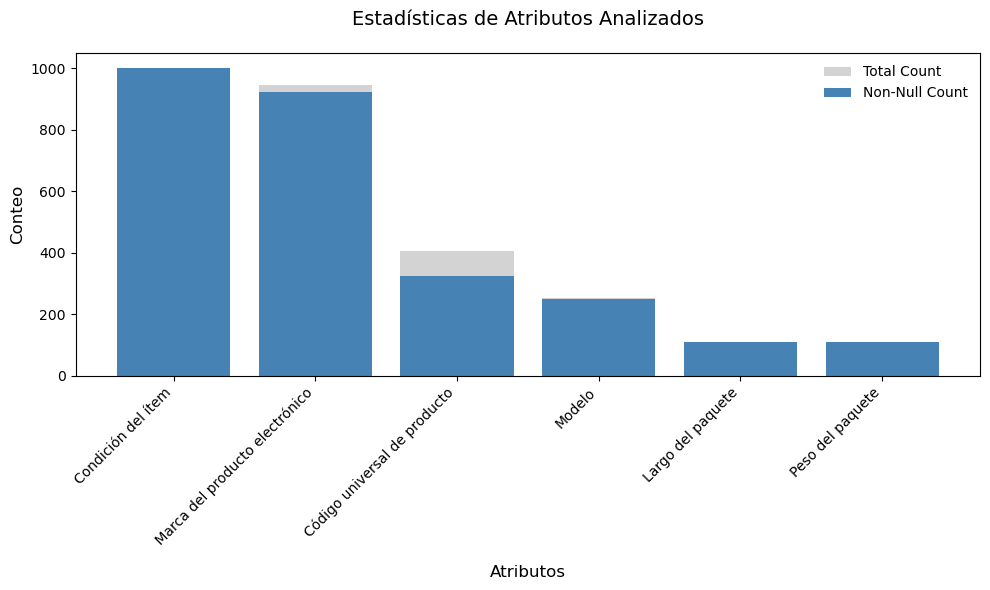

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def analyze_attributes(df, attributes_of_interest):
    """
    Analiza los atributos de interés en la columna 'attributes' del DataFrame.

    :param df: DataFrame con una columna 'attributes' que contiene listas de atributos por producto.
    :param attributes_of_interest: Lista de IDs de atributos que se desean analizar.
    :return: DataFrame con estadísticas de los atributos de interés.
    """
    # Usar defaultdict para inicializar automáticamente las estadísticas
    attribute_stats = defaultdict(lambda: {
        "name": "N/A",
        "values": [],
        "non_null_count": 0,
        "null_count": 0
    })

    # Iterar sobre la columna 'attributes'
    for attributes in df["attributes"]:
        if isinstance(attributes, list):
            for attr in attributes:
                attr_id = attr.get("id")
                attr_value = attr.get("value_name")

                if attr_id in attributes_of_interest:
                    stats = attribute_stats[attr_id]
                    stats["name"] = attr.get("name", "N/A")
                    if attr_value:
                        stats["values"].append(attr_value)
                        stats["non_null_count"] += 1
                    else:
                        stats["null_count"] += 1

    # Calcular estadísticas finales
    for attr_id, stats in attribute_stats.items():
        unique_values = set(stats["values"])
        total_count = stats["non_null_count"] + stats["null_count"]
        stats.update({
            "unique_count": len(unique_values),
            "total_count": total_count,
            "null_percentage": (stats["null_count"] / total_count * 100) if total_count > 0 else 0,
        })

    # Crear DataFrame con las estadísticas
    stats_df = pd.DataFrame.from_dict(attribute_stats, orient="index")
    stats_df = stats_df[["name", "total_count", "non_null_count", "null_count", "null_percentage", "unique_count"]]

    return stats_df


def plot_attribute_statistics(stats_df):
    """
    Genera un gráfico de barras para visualizar estadísticas de atributos.

    :param stats_df: DataFrame con estadísticas de atributos.
    """
    # Ordenar por total_count
    stats_df = stats_df.sort_values(by="total_count", ascending=False)

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(stats_df["name"], stats_df["total_count"], color="lightgray", label="Total Count")
    plt.bar(stats_df["name"], stats_df["non_null_count"], color="steelblue", label="Non-Null Count")

    # Configuración del gráfico
    plt.title("Estadísticas de Atributos Analizados", fontsize=14, pad=20)
    plt.xlabel("Atributos", fontsize=12, labelpad=10)
    plt.ylabel("Conteo", fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.legend(frameon=False, loc="upper right", fontsize=10)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()


if __name__ == "__main__":
    # Lista de atributos de interés
    attributes_of_interest = [
        "ITEM_CONDITION", "BRAND", "GTIN", "MODEL",
        "PACKAGE_LENGTH", "PACKAGE_WEIGHT"
    ]

    # Supongamos que df_pertinent ya está definido
    stats_df = analyze_attributes(df_pertinent, attributes_of_interest)

    # Mostrar las estadísticas
    print(stats_df)

    # Graficar las estadísticas
    plot_attribute_statistics(stats_df)


# Análisis de Valores Únicos y Frecuencias de Atributos de Interés

Este script analiza los valores únicos y sus frecuencias en los atributos de interés dentro de un dataset de productos.

---

## Proceso

### 1. **Definición de Atributos de Interés:**
   - Se especifica una lista de atributos relevantes para el análisis, como `BRAND`, `GTIN`, `ITEM_CONDITION`, etc.

### 2. **Inicialización de Contadores:**
   - Se utiliza un diccionario con contadores (`Counter`) para almacenar los valores únicos y su frecuencia por cada atributo.

### 3. **Iteración por Producto:**
   - Para cada fila del DataFrame:
     - Se verifica si el campo `attributes` contiene una lista.
     - Si es así, se recorren los atributos de la lista:
       - Si el atributo está en los de interés y tiene un valor (`value_name`), se incrementa su contador.

### 4. **Ordenar y Mostrar Resultados:**
   - Para cada atributo:
     - Los valores únicos se ordenan por frecuencia en orden descendente.
     - Se muestran:
       - Valores con más de una ocurrencia y sus frecuencias.
       - Un resumen de los valores únicos con una sola ocurrencia.

---

## Salida

1. **Frecuencia de Valores Únicos:**
   - Para cada atributo de interés, se muestra:
     ```
     Valores únicos de [Atributo] y sus cantidades (ordenados):
     - [Valor]: [Frecuencia]
     - Resto ([Cantidad] valores con una sola ocurrencia)
     ```

2. **Separación de Frecuencias:**
   - Valores con múltiples ocurrencias se listan con su frecuencia.
   - Los valores con una sola ocurrencia se resumen en un conteo.

---

## Aplicación

1. **Identificar Valores Frecuentes:**
   - Útil para entender cuáles son los valores predominantes en los atributos seleccionados.

2. **Reducir Dimensionalidad:**
   - Al agrupar o filtrar valores con baja frecuencia, se simplifica el análisis.

3. **Preparar Datos para Modelos:**
   - Detectar patrones en los valores más frecuentes para incluirlos como características en un modelo.



Valores únicos de BRAND y sus cantidades (ordenados):
- Luxury: 135
- Alpha: 36
- Genérica: 34
- DEL AGRO SOLUCIONES: 29
- Inti: 25
- THE RAY DRIVEN: 22
- Electro TNT: 14
- Excelite: 13
- JR CERCA ELECTRICA: 11
- TNT Electronics: 8
- Compu tools: 8
- Lhaura: 7
- inti: 7
- Super Fox: 7
- Made in China: 6
- Copperwell: 6
- Camco: 6
- JR CERCA ELÉCTRICA: 5
- RL: 5
- Cnc Maquina Láser Espejo: 5
- Ultra: 5
- Timer: 5
- Performance Tool: 5
- Bold: 4
- Inti Solar: 4
- Wgingenieria: 4
- Cnc Láser Maquina: 4
- Turnigy: 4
- Agrofer: 4
- Navcar: 4
- Leviton: 4
- ARP: 4
- Unitec: 3
- RaveStore: 3
- Skulltrap Electronics: 3
- Lmg: 3
- Pattex: 3
- Abro: 3
- Eym: 3
- One Pixel: 3
- Powest: 3
- Solar Plus: 3
- LMG: 3
- Globy: 3
- WEP: 3
- Lahura Vet: 3
- Energy Suspension: 3
- Aeroquip: 3
- Sumsour: 2
- Estilos Myf: 2
- Litio: 2
- Restarsolar: 2
- Universal: 2
- Ya Xun: 2
- Alla France: 2
- Mechanic: 2
- LedPro_Col: 2
- CRC: 2
- Solar 6A: 2
- Hitronic: 2
- Cnc láser: 2
- TURNERO: 2
- Magna: 2
- Fdk: 

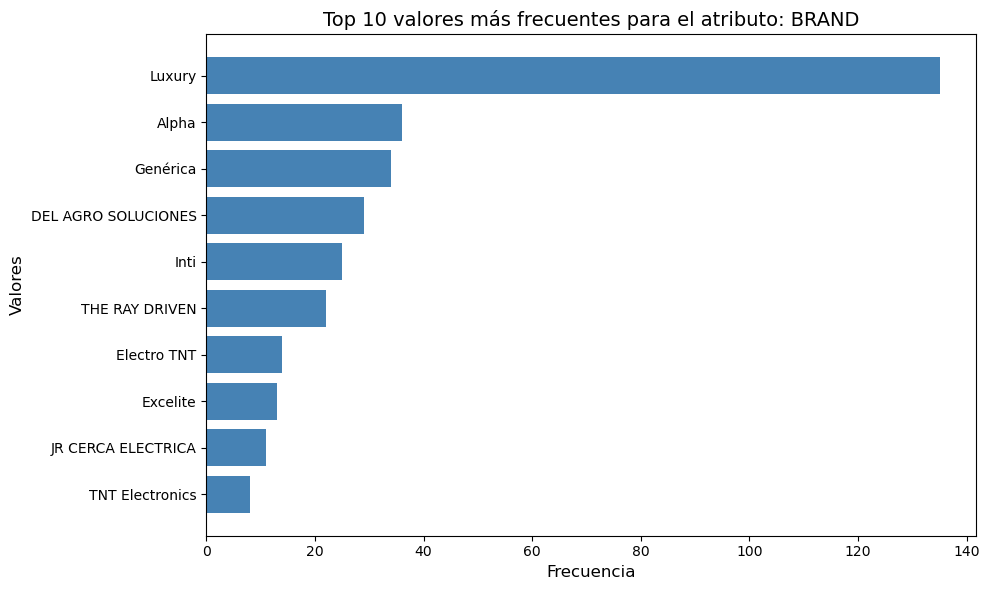

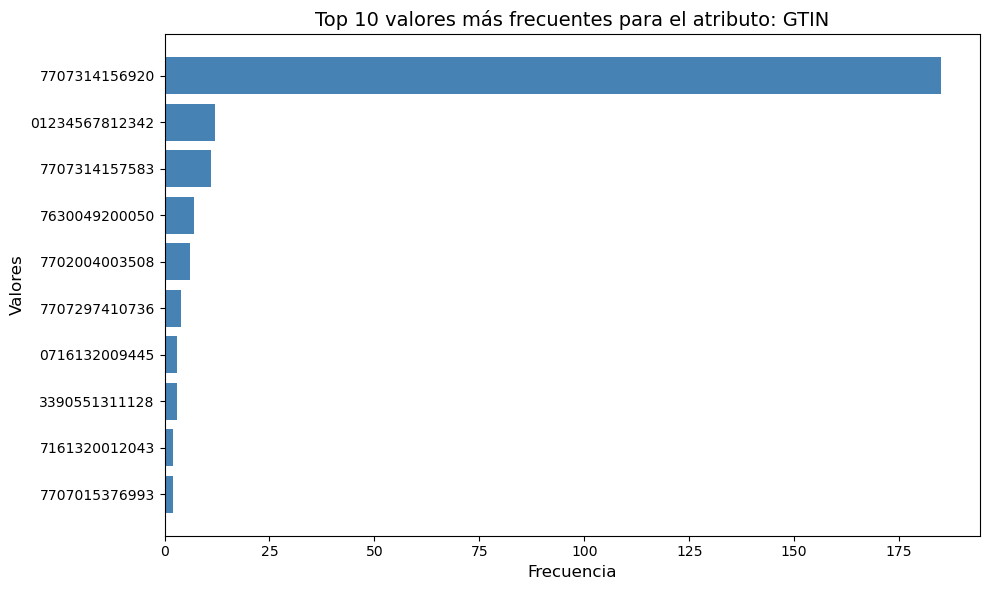

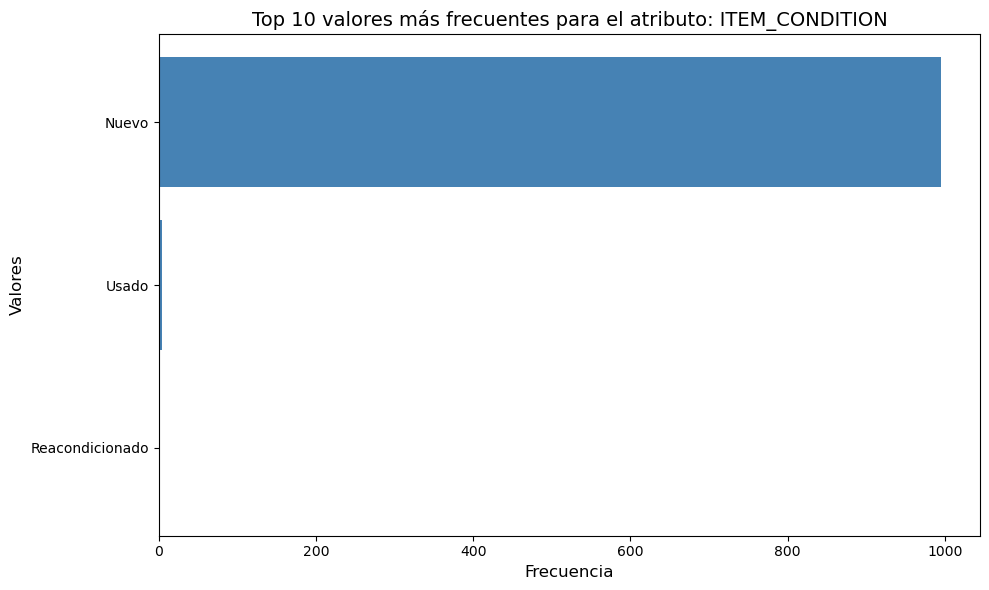

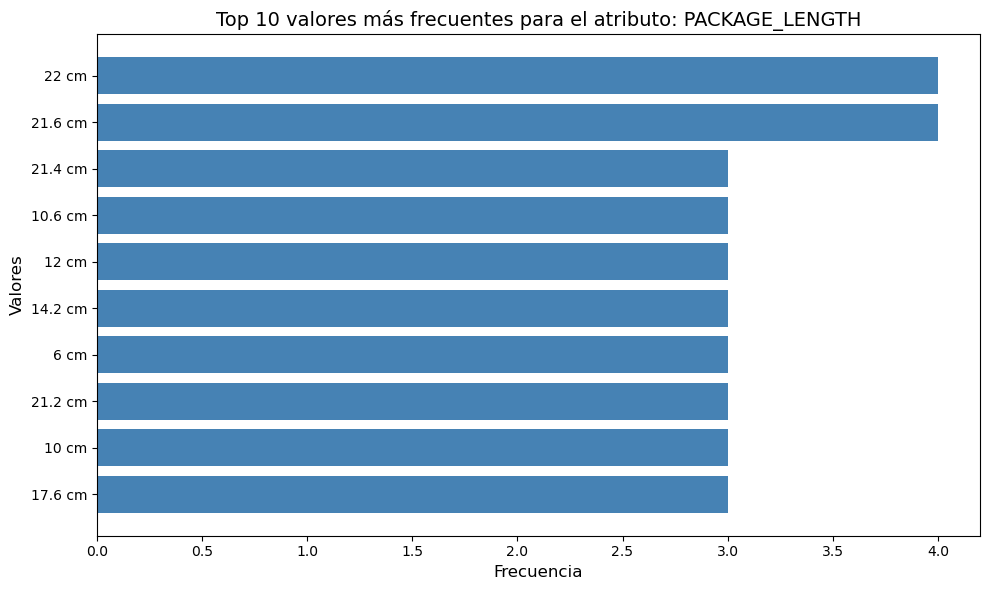

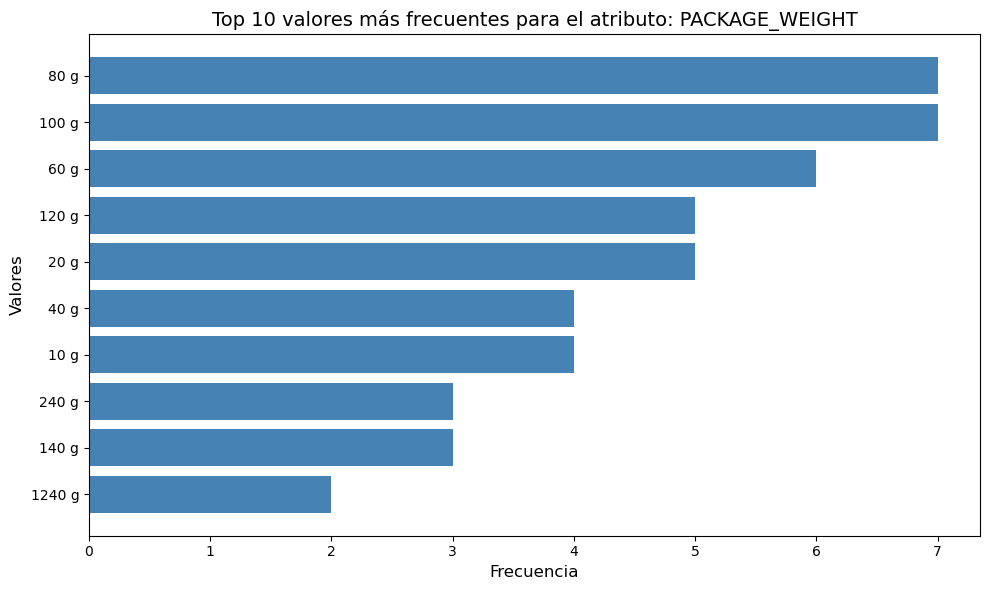

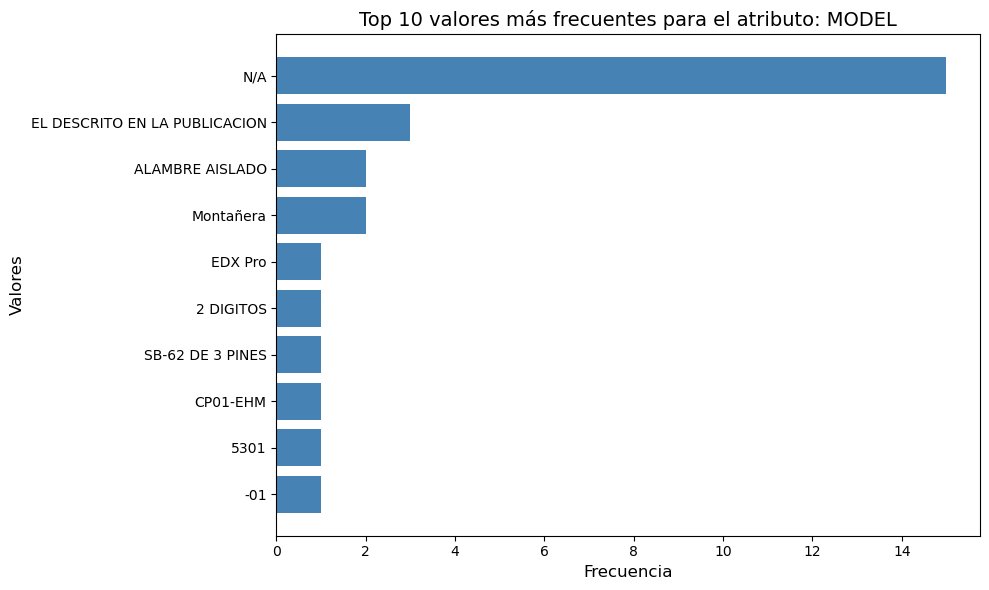

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


def analyze_attribute_values(df, attributes_of_interest):
    """
    Analiza los valores únicos y sus frecuencias para los atributos de interés.

    :param df: DataFrame con una columna 'attributes' que contiene listas de atributos por producto.
    :param attributes_of_interest: Lista de IDs de atributos que se desean analizar.
    :return: Diccionario con los contadores de valores únicos por atributo.
    """
    # Inicializar un diccionario para almacenar los valores únicos y sus frecuencias
    attribute_values = {attr: Counter() for attr in attributes_of_interest}

    # Iterar sobre las filas del DataFrame
    for _, row in df.iterrows():
        if isinstance(row['attributes'], list):  # Verificar si 'attributes' es una lista
            for attr in row['attributes']:
                attr_id = attr.get('id')
                value_name = attr.get('value_name')
                # Si el atributo está en los de interés, contar el valor
                if attr_id in attributes_of_interest and value_name:
                    attribute_values[attr_id][value_name] += 1

    return attribute_values


def display_attribute_values(attribute_values):
    """
    Muestra los valores únicos y sus frecuencias para cada atributo, ordenados por frecuencia.

    :param attribute_values: Diccionario con los contadores de valores únicos por atributo.
    """
    for attr, counter in attribute_values.items():
        print(f"\nValores únicos de {attr} y sus cantidades (ordenados):")
        # Ordenar por frecuencia de mayor a menor
        sorted_values = counter.most_common()

        # Mostrar valores con más de una ocurrencia
        for value, count in sorted_values:
            if count > 1:
                print(f"- {value}: {count}")

        # Mostrar un resumen de los valores únicos con solo una ocurrencia
        single_occurrences = [value for value, count in sorted_values if count == 1]
        if single_occurrences:
            print(f"- Resto ({len(single_occurrences)} valores con una sola ocurrencia)")
        print("-" * 50)

def plot_optimized_attribute_values(attribute_values, top_n=10):
    """
    Genera gráficos optimizados de barras horizontales para los valores más comunes de cada atributo,
    aplicando estrategias como maximizar el data-ink ratio y reducir elementos innecesarios.

    :param attribute_values: Diccionario con los contadores de valores únicos por atributo.
    :param top_n: Número de valores más comunes a mostrar en el gráfico.
    """
    for attr, counter in attribute_values.items():
        # Seleccionar los `top_n` valores más frecuentes
        most_common = counter.most_common(top_n)

        if most_common:
            values, counts = zip(*most_common)

            # Crear el gráfico de barras horizontal
            plt.figure(figsize=(10, 6))
            bars = plt.barh(values, counts, color="steelblue", edgecolor="none")

            # Etiquetas directas en las barras para maximizar el data-ink ratio
            for bar, count in zip(bars, counts):
                plt.text(
                    bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,
                    f"{count}", va="center", fontsize=10, color="black"
                )

            # Resaltar la barra con mayor frecuencia
            bars[0].set_color("darkblue")

            # Configuración del gráfico
            plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más frecuente arriba
            plt.title(f"Top {top_n} valores para el atributo: {attr}", fontsize=14, pad=15)
            plt.xlabel("Frecuencia", fontsize=12)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.grid(axis="x", linestyle="--", alpha=0.7)  # Solo mantener la cuadrícula vertical

            # Eliminar bordes innecesarios
            plt.gca().spines["top"].set_visible(False)
            plt.gca().spines["right"].set_visible(False)
            plt.gca().spines["left"].set_visible(False)

            # Ajustar espaciado
            plt.tight_layout()

            # Mostrar el gráfico
            plt.show()



if __name__ == "__main__":
    # Lista de atributos de interés
    attributes_of_interest = ["BRAND", "GTIN", "ITEM_CONDITION", "PACKAGE_LENGTH", "PACKAGE_WEIGHT", "MODEL"]

    # Supongamos que df_pertinent ya está definido
    attribute_values = analyze_attribute_values(df_pertinent, attributes_of_interest)

    # Mostrar las estadísticas en texto
    display_attribute_values(attribute_values)

    # Graficar los valores más comunes
    plot_attribute_values(attribute_values, top_n=10)


**Razones de aceptación o descarte de los atributos:**

1. **Atributo `BRAND`**  
   - **Aceptado** debido a su amplia cobertura y a que presenta valores repetidos, lo cual permite identificar grupos de artículos que comparten la misma marca.

2. **Atributo `GTIN`**  
   - **Aceptado** en aquellos casos en que aparezca repetido, pues actúa como referencia confiable para unir artículos equivalentes, incluso si los venden distintos vendedores. Aunque no lo reporten todos los productos, sigue siendo muy valioso para agrupar los que sí lo tienen.

3. **Atributo `ITEM_CONDITION`**  
   - **Descartado** por estar demasiado sesgado hacia “Nuevo” y aportar poca diferenciación global en el conjunto.

4. **Atributos `PACKAGE_LENGTH` y `PACKAGE_WEIGHT`**  
   - **Descartados** por la baja cobertura (alrededor de 10%) y por la gran dispersión de valores, que dificulta su uso para la mayoría de los productos.

5. **Atributo `MODEL`**  
   - **Descartado** debido a la cobertura limitada (aproximadamente 25%) y a que la mayoría de los valores son únicos por producto, lo que impide una agrupación significativa en la práctica.

In [29]:
# Atributos seleccionados para incluir (aceptados)
accepted_attributes = ["BRAND", "GTIN"]

# Función para extraer los valores de atributos seleccionados
def extract_attribute_value(attributes, attribute_id):
    if isinstance(attributes, list):
        for attr in attributes:
            if attr.get('id') == attribute_id:
                return attr.get('value_name')  # Extrae el valor legible del atributo
    return None  # Si no se encuentra el atributo, devuelve None

# Crear un nuevo DataFrame basado en df_pertinent con los atributos aceptados
df_propuesto = df_pertinent.copy()

# Agregar columnas para los atributos aceptados
for attribute_id in accepted_attributes:
    df_propuesto[attribute_id.lower()] = df_propuesto['attributes'].apply(lambda x: extract_attribute_value(x, attribute_id))

# Eliminar la columna 'attributes' ya que no se requiere más
df_propuesto.drop(columns=['attributes'], inplace=True)

# Mostrar el DataFrame propuesto al usuario
df_propuesto

,id,title,thumbnail,price,brand,gtin
0,MCO1312345739,Cerca 75km - Ganado - Impulsor,http://http2.mlstatic.com/D_926804-MCO70350738...,165000,CERCAS DEL ORIENTE,"000223213232,000055393829"
1,MCO1401210195,Planta Cerca Electrica Para Ganado 50km M. Jr,http://http2.mlstatic.com/D_802783-MCO74899505...,140000,JR CERCA ELECTRICA,None
2,MCO601595467,Limpiador Electrónico -removedor De Polvo - A...,http://http2.mlstatic.com/D_995727-MCO73203873...,21500,ABRO DUSTER,None
3,MCO611865640,"Planta Cerca Eléctrica Solar 100km, Incluye Pa...",http://http2.mlstatic.com/D_844953-MCO45203598...,690000,UNIVERSAL ELECTRÓNICS,None
4,MCO599963912,Tensor Metálico Para Cerca Eléctrica Para 500 ...,http://http2.mlstatic.com/D_797256-MCO71264690...,6600,Luxury,7707314156920
...,...,...,...,...,...,...
995,MCO542097832,Gripple Plus Medium Pack De 20 | Alambre Joine...,http://http2.mlstatic.com/D_926412-MCO44224848...,274000,Yardware etcetera,"672205002204,0672205002204"
996,MCO542414089,Presurizador Bomba Automatico Soluciona La Baj...,http://http2.mlstatic.com/D_914137-MCO45760245...,379999,Dmgas,None
997,MCO542469534,"8,5 X 11 Sostenedor De La Muestra De Acrílico ...",http://http2.mlstatic.com/D_864629-MCO40475967...,210000,Arraview,"605930132700,0605930132700"
998,MCO542656528,Fantasia Walt Disney Video Laserdisc- Musical ...,http://http2.mlstatic.com/D_841362-MCO28010690...,55000,None,None


In [30]:
df_propuesto.to_csv("../data/df_propuesto.csv", index=False, encoding="utf-8")
